In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.gridspec as gridspec
from subprocess import check_output

In [2]:
import pandas as pd
import numpy as np
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True, low_memory=False, nrows=1000000)
    df = reduce_mem_usage(df)
    return df

In [3]:
print('-' * 80)
print('df_raw')
df_raw = import_data(r'D:\Python\Lambda School Python\Unit 2 Project\CSVs\LeagueofLegends.csv')

print('-' * 80)
print('df')
df_columns = import_data(r'D:\Python\Lambda School Python\Unit 2 Project\CSVs\_columns.csv')

print('-' * 80)

--------------------------------------------------------------------------------
df_raw
Memory usage of dataframe is 3.31 MB
Memory usage after optimization is: 9.62 MB
Decreased by -190.4%
--------------------------------------------------------------------------------
df
Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.01 MB
Decreased by -503.3%
--------------------------------------------------------------------------------


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7620 entries, 0 to 7619
Data columns (total 57 columns):
League              7620 non-null category
Year                7620 non-null int16
Season              7620 non-null category
Type                7620 non-null category
blueTeamTag         7582 non-null category
bResult             7620 non-null int8
rResult             7620 non-null int8
redTeamTag          7583 non-null category
gamelength          7620 non-null int8
golddiff            7620 non-null category
goldblue            7620 non-null category
bKills              7620 non-null category
bTowers             7620 non-null category
bInhibs             7620 non-null category
bDragons            7620 non-null category
bBarons             7620 non-null category
bHeralds            7620 non-null category
goldred             7620 non-null category
rKills              7620 non-null category
rTowers             7620 non-null category
rInhibs             7620 non-null category
rDrag

In [5]:
df = df_raw.copy(deep=True)
df['win_team'] = np.where(df['bResult']==1, 'blue', 'red')
df[['win_team', 'bResult', 'rResult']].head()

,win_team,bResult,rResult
0,blue,1,0
1,red,0,1
2,blue,1,0
3,red,0,1
4,blue,1,0


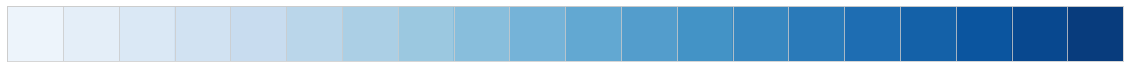

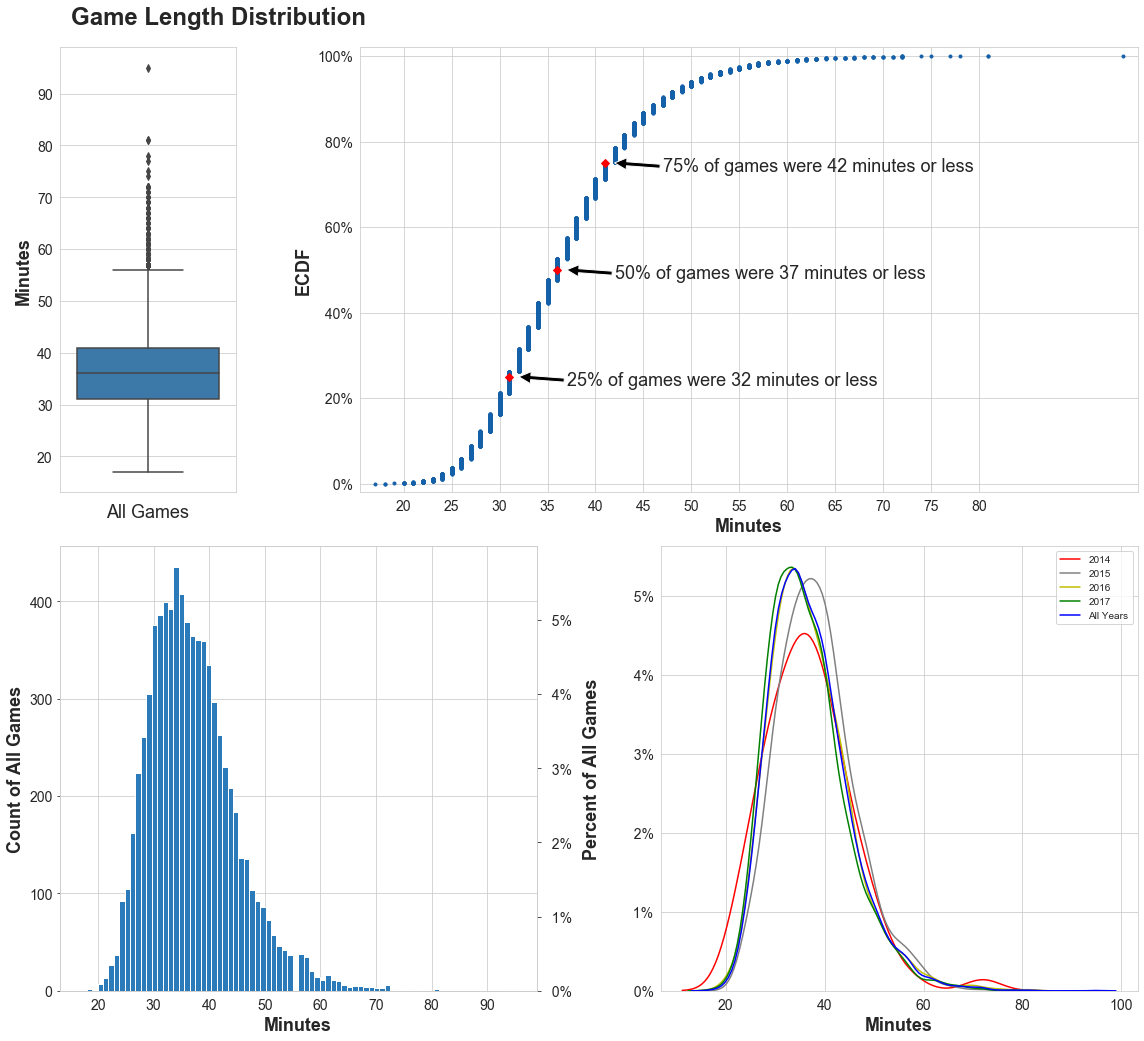

In [10]:
# Setstyle options
sns.set_style('whitegrid')
sns.palplot(sns.color_palette('Blues', 20))
colors = sns.color_palette('Blues', 20)

# Create Figure
fig, ax = plt.subplots(2,4, figsize=(16,14))
fig.suptitle('Game Length Distribution', x=0.065, y=1.03, fontsize=24, fontweight='bold', 
             horizontalalignment='left')
fig.subplots_adjust(top=0.9)

percentiles = np.array([25, 50, 75])
ptiles_gl = np.percentile(df['gamelength'], percentiles)

# Create Subplots

# 1 Box and Whisker
p1 = plt.subplot2grid((2,4), (0,0), colspan=1)
sns.boxplot(y=df['gamelength'], color=colors[14])
# Swarm plot adds no value here, ignore below
# sns.swarmplot(y=df['gamelength'], color=colors[2])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('All Games', fontsize=18)
plt.ylabel('Minutes', fontsize = 18, fontweight = 'bold')

# 2 ECDF Plot
p2 = plt.subplot2grid((2,4), (0,1), colspan=3)
x = np.sort(df['gamelength'])
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x,y, marker='.', linestyle='none', color=colors[16])
plt.plot(ptiles_gl, percentiles/100, marker='D', color='red', linestyle='none')

# 2 ECDF Formatting (a lot)
yvals = p2.get_yticks()
p2.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(np.arange(0, 85, 5), fontsize=14)
plt.xlabel('Minutes', fontsize=18, fontweight = 'bold')
plt.ylabel('ECDF', fontsize=18, fontweight='bold')
plt.margins(0.02)

plt.annotate('25% of games were 32 minutes or less', xy=(32, .25), xytext=(37, .23), fontsize=18, 
             arrowprops=dict(facecolor='black'))
plt.annotate('50% of games were 37 minutes or less', xy=(37, .5), xytext=(42, .48), 
             fontsize=18, arrowprops=dict(facecolor='black'))
plt.annotate('75% of games were 42 minutes or less', xy=(42, .75), xytext=(47, .73), fontsize=18, 
             arrowprops=dict(facecolor='black'))

# 3 Histogram Count
p3 = plt.subplot2grid((2,4), (1,0), colspan=2)
plt.hist(x='gamelength', bins=80, data=df, color=colors[14])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Minutes', fontweight = 'bold', fontsize = 18)
plt.ylabel('Count of All Games', fontsize=18, fontweight='bold')

# 3 Histogram Percentage - Second Y Axis for Percent (To DO - align Y2 ytick values to Y1 ytick lines)
weights = np.ones_like(df['gamelength']) / len(df['gamelength'])
p3 = plt.twinx()
plt.hist(x='gamelength', bins=80, weights= weights, data=df, color=colors[14])
yvals = p3.get_yticks()
p3.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
p3.grid(b=False)

# 4 Distribution Plot across Years
p4 = plt.subplot2grid((2,4), (1,2), colspan=2)
sns.distplot((df['gamelength'][df['Year']==2014]), hist=False, color='r', label='2014')
sns.distplot((df['gamelength'][df['Year']==2015]), hist=False, color='grey', label='2015')
sns.distplot((df['gamelength'][df['Year']==2016]), hist=False, color='y', label='2016')
sns.distplot((df['gamelength'][df['Year']==2017]), hist=False, color='g', label='2017')
sns.distplot((df['gamelength']), hist=False, color='b', label='All Years')
# Formatting
yvals = p4.get_yticks()
p4.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Percent of All Games\n', fontsize=18, fontweight='bold')
plt.xlabel('Minutes', fontsize = 18, fontweight = 'bold')

# Show everything
plt.tight_layout()
plt.show()

In [11]:
pvt_wins_y = df.pivot_table(index = 'Year', values = ['bResult', 'rResult'], aggfunc = np.sum,  
                                margins = False)
pvt_wins_y['b_net_wins'] = pvt_wins_y['bResult'] - pvt_wins_y['rResult']
pvt_wins_y['b_win_pcnt'] = pvt_wins_y['bResult'] / (pvt_wins_y['bResult'] + pvt_wins_y['rResult'])
pvt_wins_y['b_pcnt_diff'] = pvt_wins_y['b_win_pcnt'] -.5
pvt_wins_y

,bResult,rResult,b_net_wins,b_win_pcnt,b_pcnt_diff
Year,,,,,
2014,46.0,32.0,14.0,0.589744,0.089744
2015,818.0,678.0,140.0,0.546791,0.046791
2016,1317.0,1177.0,140.0,0.528067,0.028067
2017,1832.0,1479.0,353.0,0.553307,0.053307
2018,133.0,108.0,25.0,0.551867,0.051867


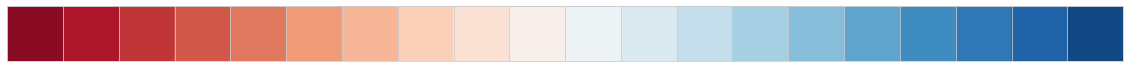

In [12]:
sns.palplot(sns.color_palette('RdBu', 20))

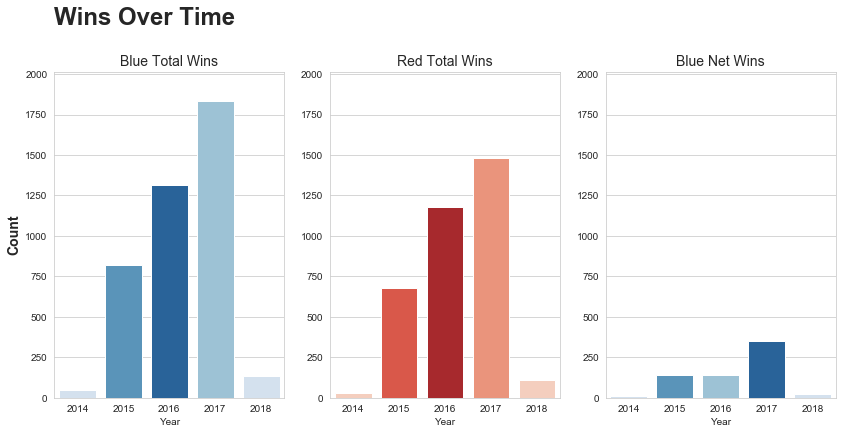

In [13]:
# Set plot styles and colors
blues = sns.color_palette('Blues', 4)
reds = sns.color_palette('Reds', 4)

# Control y 
y_max = 1.1 * max(max(pvt_wins_y['bResult']), max(pvt_wins_y['rResult']))

fig, axes = plt.subplots(1,3, figsize=(14,6))
fig.suptitle('Wins Over Time', x=0.125, y=1.03, fontsize=24, fontweight='bold', 
             horizontalalignment='left')

# Blue Total Wins Plot
plt.subplot(1,3,1)
sns.barplot(x=pvt_wins_y.index, y='bResult', data = pvt_wins_y, palette=[blues[0], blues[2], blues[3], blues[1]])
plt.title('Blue Total Wins', fontsize=14)
plt.ylim(0, y_max)
plt.ylabel('Count', fontsize = 14, fontweight = 'bold')

# Red Total Wins Plot
plt.subplot(1,3,2)
sns.barplot(x=pvt_wins_y.index, y='rResult', data = pvt_wins_y, palette=[reds[0], reds[2], reds[3], reds[1]])
plt.title('Red Total Wins', fontsize=14)
plt.ylim(0, y_max)
plt.ylabel('')

# Blue Net Wins Plot
plt.subplot(1,3,3)
sns.barplot(x=pvt_wins_y.index, y='b_net_wins', data = pvt_wins_y, palette=[blues[0], blues[2], blues[1], blues[3]])
plt.title('Blue Net Wins', fontsize=14)
plt.ylim(0, y_max)
plt.ylabel('')

plt.show()

In [20]:
df['League'].value_counts()

LCK      1445
NALCS    1272
EULCS    1099
LMS       778
TCL       653
OPL       458
WC        308
CBLoL     301
LCL       281
LJL       258
LLN       242
CLS       175
IEM       138
MSI       111
RR        101
Name: League, dtype: int64

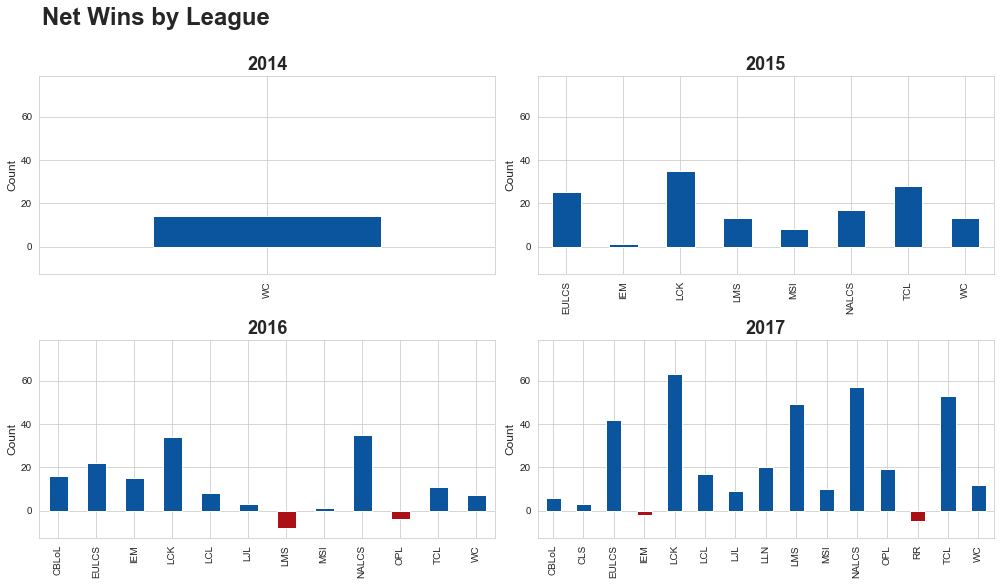

In [21]:
# Pivot by Year and League
pvt_net_wins_yl = df.pivot_table(index = ['Year', 'League'], values = ['bResult', 'rResult'], aggfunc=np.sum)
pvt_net_wins_yl['b_net_wins'] = pvt_net_wins_yl['bResult'] - pvt_net_wins_yl['rResult']
pvt_net_wins_yl['positive'] = pvt_net_wins_yl['b_net_wins'] > 0

# Color Formatting
blues = sns.color_palette('Blues')
reds = sns.color_palette('Reds')

lst_years = pd.unique(pvt_net_wins_yl.index.get_level_values(0))
lst_x = [1, 2, 3, 4]

y_max = 1.25 * pvt_net_wins_yl['b_net_wins'].max()
y_min = 1.25 * pvt_net_wins_yl['b_net_wins'].min()

fig, ax = plt.subplots(2,2, figsize = (14,8))
fig.suptitle('Net Wins by League', x=0.045, y=1.01, fontsize=24, fontweight='bold', horizontalalignment='left')

for y, x in zip(lst_years, lst_x):
    # Filter pvt for year
    pvt_net_wins_yx = pvt_net_wins_yl[np.in1d(pvt_net_wins_yl.index.get_level_values(0), y)]
    pvt_net_wins_yx = pvt_net_wins_yx.reset_index(level=0, drop=True)
    
    p = plt.subplot(2,2,x)

    # Plot across Leagues
    pvt_net_wins_yx['b_net_wins'].plot(kind='bar', 
                                       color=pvt_net_wins_yx.positive.map({True:blues[5], 
                                                                           False:reds[5]}))
    
    # Format each plot
    plt.title(y, fontsize= 18, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Count', fontsize=12)
    plt.ylim(y_min, y_max)

plt.tight_layout()
fig.subplots_adjust(top=0.89)
plt.show()  